# Physics-informed NNs

ADs: Optimization.{AutoZygote, AutoForwardDiff, AutoFiniteDiff, AutoReverseDiff}()

In [2]:
using Flux, Optim, Optimization, Plots, Solaris
using Solaris.DiffEqFlux: FastDense, FastChain, initial_params

## 1D exponential solution

$\omega u + u_x=0$

In [3]:
# setups
nx, ω = 100, 1.0

X = collect(range(0, 1, length=nx)) |> permutedims
Y = zeros(axes(X));

In [4]:
ann = FastChain(FastDense(1, 20, tanh), FastDense(20, 1))
p = initial_params(ann);
θ = [vcat(X...); p];

┌ Warning: FastChain is being deprecated in favor of Lux.jl. Lux.jl uses functions with explicit parameters f(u,p) like FastChain, but is fully featured and documented machine learning library. See the Lux.jl documentation for more details.
└ @ DiffEqFlux /home2/vavrines/.julia/packages/DiffEqFlux/zUISf/src/fast_layers.jl:9


In [8]:
function loss(θ)
    u0 = hcat(θ[1:nx]...)
    p = θ[nx+1:end]
    
    u(x) = 1 .+ ann(x, p) .* x
    ux(x) = Flux.Zygote.pullback(u, x)[2](ones(size(x)))[1] # auto diff
    #ux(x) = central_diff(u(x)[:], x[:]) |> permutedims # finite diff

    pred = ω .* u(u0) .+ ux(u0)
    loss = sum(abs2, pred)
    
    return loss
end

loss (generic function with 1 method)

In [9]:
cb = function (θ, l)
    display(l)
    return false
end

#7 (generic function with 1 method)

In [10]:
res = sci_train(loss, θ, ADAM(), Optimization.AutoReverseDiff(); cb=cb, maxiters=300)

29.55800413618058

28.85326537782446

28.268285191124786

27.77412133186999

27.312980311065466

26.8463653249807

26.365862507783415

25.874711846640086

25.378486909223483

24.882425909703183

24.390790150944163

23.906741857941082

23.432350068089953

22.968642830738517

22.515710815158577

22.072886391431766

21.639008164223316

21.21274583621548

20.79292315128664

20.378762414769493

19.96999464586432

19.566823147086122

19.169771758639172

18.779475318556962

18.396474924726036

18.021069067690785

17.653250196713422

17.292730683429447

16.939038174427374

16.59164404488838

16.250084724181143

15.914044408180628

15.583384374658518

15.258121621956924

14.938372168432725

14.624279917668153

14.315951292467265

14.013410850874559

13.71658575362666

13.425318875969488

13.139403107532882

12.858624555873218

12.582801217119915

12.311806492082995

12.045572687869516

11.784076316830955

11.527312351541694

11.275267044220369

11.02789803981125

10.785126996623008

10.546845221572433

10.312928585986674

10.083255534096788

9.857721907263164

9.636248288775947

9.418778666888677

9.205272225070127

8.995692024511294

8.789994775580125

8.588124895269932

8.39001414652332

8.19558609396323

8.004763090451931

7.817472974466124

7.633653172133664

7.453251150697894

7.276221624289402

7.102522020016187

6.93210811699923

6.764931419490413

6.6009389496710495

6.440075142696112

6.282284788396929

6.127515731362641

5.975720330279265

5.826855303559763

5.680880263558024

5.537755700134039

5.397441271185083

5.259895007738689

5.125073590991815

4.992933412668649

4.863431863508116

4.736528288556811

4.6121842684121654

4.490363211754701

4.371029528459594

4.254147783435526

4.13968217661677

4.027596503635876

3.9178545245415246

3.8104205060115506

3.70525966547455

3.6023383311385153

3.5016237852739676

3.4030839026521664

3.3066867698301716

3.2124004517590974

3.1201929818444625

3.030032540495815

2.9418877080513273

2.8557276618372485

2.77152223233591

2.689241810610143

2.6088571682931114

2.530339281866285

2.453659236163227

2.3787882328574055

2.305697676083922

2.234359275406041

2.1647451081091136

2.0968276124109

2.030579522113198

1.965973781067553

1.9029834804941215

1.8415818447155994

1.7817422631183555

1.7234383434666423

1.6666439547401457

1.6113332377042748

1.5574805809468204

1.5050605778439112

1.454047987082902

1.4044177138771619

1.3561448156076399

1.3092045224923057

1.2635722578573576

1.2192236457513983

1.1761345028984782

1.1342808214138353

1.0936387531576275

1.0541846043714582

1.0158948425186443

0.9787461103806463

0.9427152392683441

0.9077792549406412

0.8739153748260442

0.8411010001711932

0.8093137089981955

0.7785312544024957

0.7487315690828719

0.7198927734829516

0.6919931835193539

0.6650113150410433

0.6389258848103624

0.6137158101230955

0.5893602098545418

0.5658384085744531

0.5431299433664193

0.521214571450568

0.5000722765053616

0.47968327265319194

0.4600280065952227

0.4410871593777718

0.422841649228412

0.4052726360057573

0.3883615267413626

0.37208998119299

0.35643991653357276

0.34139351101039966

0.3269332070886886

0.313041714810282

0.299702015782281

0.2868973676464829

0.27461130847265336

0.2628276605125161

0.25153053309718976

0.24070432488818821

0.2303337259165766

0.22040371975523287

0.21089958587417446

0.20180690195331907

0.19311154584644274

0.18479969702278654

0.1768578375321996

0.1692727526820778

0.16203153159473105

0.15512156767177088

0.14853055884585148

0.14224650745341008

0.1362577196350413

0.13055280429734956

0.12512067175822533

0.11995053219362126

0.11503189392614488

0.11035456150982269

0.1059086335316452

0.10168450008298599

0.09767283991796645

0.09386461736036966

0.09025107901723324

0.08682375031673441

0.08357443184647712

0.08049519545722524

0.07757838012094949

0.07481658756913144

0.07220267775941909

0.06972976421268927

0.06739120923734425

0.06518061903452949

0.06309183867304496

0.061118946936114964

0.05925625106052483

0.05749828139721962

0.05583978601642153

0.054275725266661225

0.052801266287458896

0.05141177747652678

0.05010282292170703

0.048870156816978955

0.047709717883680086

0.0466176238121077

0.04559016573029474

0.04462380270230121

0.04371515626005786

0.04286100497783093

0.042058279101861

0.04130405524685931

0.04059555116687382

0.03993012060408179

0.03930524821805233

0.038718544599940896

0.038167741378578555

0.0376506864260412

0.03716533916846222

0.03670976600499241

0.03628213583594588

0.03588071570120454

0.03550386653114612

0.035150039013221945

0.034817769576870036

0.03450567649798795

0.03421245612277556

0.033936879210248606

0.03367778739311409

0.03343408975726688

0.03320475954014858

0.03298883094750043

0.0327853960870845

0.032593602017375344

0.032412647909237494

0.032241782318923703

0.032080300570886504

0.03192754224865204

0.0317828887915149

0.03164576119441078

0.0315156178082439

0.031391952238101636

0.03127429133693822

0.031162193292258417

0.03105524580310793

0.030953064344443226

0.030855290515894897

0.030761590472041522

0.03067165343145662

0.030585190261853374

0.03050193213859201

0.030421629273724063

0.030344049712730477

0.030268978196189216

0.030196215083722857

0.030125575337675577

0.030056887563974236

0.029989993107631528

0.029924745200364793

0.029861008157891687

0.029798656624570062

0.029737574863156396

0.0296776560875123

0.029618801836126946

0.029560921384367427

0.029503931193443026

0.02944775439416475

0.02939232030366813

0.02933756397333787

0.029283425766220894

0.029229850962274026

0.02917678938985886

0.029124195081983013

0.029072025955863993

0.029020243514457842

0.028968812568649676

0.02891770097885681

0.02886687941485008

0.028816321132670627

0.028766001767574486

0.028715899141998055

0.02866599308758131

0.028616265280333817

0.028566699088077113

0.028517279429349784

0.02846799264301347

0.028418826367836054

0.02836976943137703

0.02832081174752729

0.028271944222099787

0.02822315866590247

0.02817444771476194

0.028125804755998615

0.02807722386088528

0.02807722386088528

u: 161-element Vector{Float64}:
  0.10684819386440064
  0.11581445788848567
  0.12480602079664521
  0.1338222979587177
  0.14286269767917847
  0.15192662088323694
  0.161013460717497
  0.17012260205897595
  0.17925342092518212
  0.1884052837766709
  0.19757754670203911
  0.206769554473591
  0.21598063945993595
  ⋮
  0.2404992479087258
 -0.3461497080288826
 -0.4161926341611896
 -0.09170042977566689
  0.24815310234540927
  0.44430107356231047
  0.19490785176517034
  0.5335725537887974
 -0.42121366373125957
  0.36519620746479486
 -0.2534591996970426
 -0.10408603032498032

In [11]:
res = sci_train(loss, res.u, LBFGS(), Optimization.AutoReverseDiff(); cb=cb, maxiters=200)

0.02807722386088528

0.0280061536762813

0.024830247810762308

0.021918404603474786

0.018094221848429792

0.0064285904223469565

0.002798246036975854

0.0009735415999214201

0.0007694414074394198

0.0007643186106434119

0.0007632586067636864

0.0007417714891558826

0.00043271646990948175

0.0002796077552513019

0.00023121876498802084

0.0001995675993232851

0.00016783995030475126

0.0001484520908969898

0.00013085592940385865

0.00012727193758248732

0.00011586836090590879

9.799344516855963e-5

9.512398014097689e-5

8.659742359880988e-5

8.294878550936252e-5

8.058728033343619e-5

7.772546169447545e-5

7.380028569707268e-5

7.168708018628674e-5

6.845521916010629e-5

6.651617833408248e-5

6.476573749063962e-5

6.168756186239165e-5

5.959603820607695e-5

5.743527758503188e-5

5.465890490977172e-5

5.40047288682138e-5

5.221911994947751e-5

5.085908783228875e-5

4.850496367812967e-5

4.705050312776348e-5

4.5501344474687616e-5

4.38213829260395e-5

4.1636001688781757e-5

4.0616824063539024e-5

3.942913222116955e-5

3.8859176604445425e-5

3.8297998682814515e-5

3.758690963237369e-5

3.672436248511379e-5

3.4058550261400835e-5

3.3805829746703236e-5

3.26311609627114e-5

3.221011332958118e-5

3.10848088267186e-5

2.9859347558268823e-5

2.888799817490356e-5

2.7778253731924713e-5

2.721142039497411e-5

2.5602991489353808e-5

2.4490208339691084e-5

2.3217450275041663e-5

2.2565885996628838e-5

2.0535041935417726e-5

1.9736363357495397e-5

1.9259817213406876e-5

1.8595542284129453e-5

1.7416328458802366e-5

1.6580129104880717e-5

1.6363917196856472e-5

1.6253326203422e-5

1.6192183434493083e-5

1.618052133086663e-5

1.6179872890605963e-5

1.617983834956348e-5

1.6179501297313663e-5

1.5654312250314163e-5

1.555132439415327e-5

1.529077190285156e-5

1.4761280929744467e-5

1.2858533044625029e-5

1.2235113220126326e-5

1.1138733283191582e-5

1.024419348754906e-5

9.45134214142249e-6

8.193655880013689e-6

6.935021362664598e-6

4.529367405394755e-6

3.7978927711276494e-6

3.545528799725853e-6

3.381472193868442e-6

3.2000083178793988e-6

3.112270908679491e-6

2.884741629055978e-6

2.47640511574166e-6

2.248895315832993e-6

2.1988795192584994e-6

2.154918644901327e-6

2.1283953005890603e-6

2.0555046863448584e-6

1.4772399121522994e-6

1.28150959105107e-6

1.058954616133202e-6

8.818045610372549e-7

6.99122225543736e-7

6.160234650190904e-7

4.950975265101781e-7

4.703671338009313e-7

4.459653546949158e-7

4.2299205594407126e-7

4.0162238709335526e-7

3.458513136052043e-7

3.413884848074232e-7

2.8856365704185085e-7

2.4315806601165585e-7

2.2014843015256897e-7

2.0060978161979534e-7

1.8607148734012837e-7

1.6677219951734968e-7

1.5050459603254764e-7

1.4578685878935577e-7

1.4230272737962192e-7

1.2488589126516522e-7

1.0882428482124838e-7

9.056109583794256e-8

8.955270667362226e-8

8.526282301826314e-8

8.178660856394258e-8

7.907043062573149e-8

7.730301718123028e-8

7.578243551387644e-8

7.408197146669031e-8

7.214502170356424e-8

7.128217764348437e-8

6.778397535650605e-8

6.72488163581355e-8

6.70933390249016e-8

6.667339077953786e-8

6.646764023270395e-8

6.63585774278189e-8

6.617355357092858e-8

6.583585496219345e-8

6.439226361811335e-8

6.35637485350929e-8

6.26798448623641e-8

5.941895071096251e-8

5.450971044822165e-8

5.0022403817993934e-8

4.3925741861536864e-8

3.731363341118987e-8

3.5401167449873794e-8

3.334634961543494e-8

3.301725249128049e-8

3.294880404485247e-8

3.283266472428969e-8

3.283001618412815e-8

3.2829638871599464e-8

3.282957096489655e-8

3.2824890962015535e-8

3.277795134112005e-8

3.277093924760247e-8

3.27451874733233e-8

3.270642082590149e-8

3.264028078814209e-8

3.2412098138404863e-8

3.2216201382882506e-8

3.19512001803753e-8

3.189340215104813e-8

3.162466373649117e-8

3.139954846992918e-8

3.090261001435397e-8

3.0675725088016654e-8

3.030977338581047e-8

3.028409787374546e-8

3.02515479740088e-8

3.023787892741856e-8

3.02109748030865e-8

3.017058358615747e-8

3.003822117558121e-8

2.985629026241921e-8

2.9715044905274108e-8

2.9629478498837105e-8

2.9254441146906976e-8

2.92109513365965e-8

2.9106845243763245e-8

2.9097387822753032e-8

2.9092889917491023e-8

2.9073926285932464e-8

2.903751308344575e-8

2.8790629564882392e-8

2.8694372246645037e-8

2.8477652738464966e-8

2.8397352190859412e-8

2.8265139368613783e-8

2.8218390968419125e-8

2.8207662504461667e-8

2.8201845493460355e-8

2.8186254131225646e-8

2.7667881419014962e-8

2.7643795599821617e-8

2.7526954241514452e-8

u: 161-element Vector{Float64}:
  0.3341304249829608
  0.4743921564015757
  0.45161849415087363
  0.4019139495039127
  0.3718660986655538
  0.3584397025103452
  0.34303144035788086
  0.3130869767225021
  0.2698123468603587
  0.22529924397088694
  0.19473402499514855
  0.18883115728787989
  0.20993927748427046
  ⋮
  0.25119402582924766
  0.028200362118490713
 -0.48781155293451584
 -0.03121498392525201
  0.27808920119921715
  0.5024841095991764
  0.22076508930211897
  0.6174404946959413
 -0.14407330553467754
  0.42551768918016697
 -0.2841447638650092
 -0.30121282599213595

In [12]:
xTest = Vector(range(0., 1., length=33))
xTest = hcat(xTest...)
yTest = exp.(-xTest)
yPred = 1 .+ ann(xTest, res.minimizer[nx+1:end]) .* xTest;

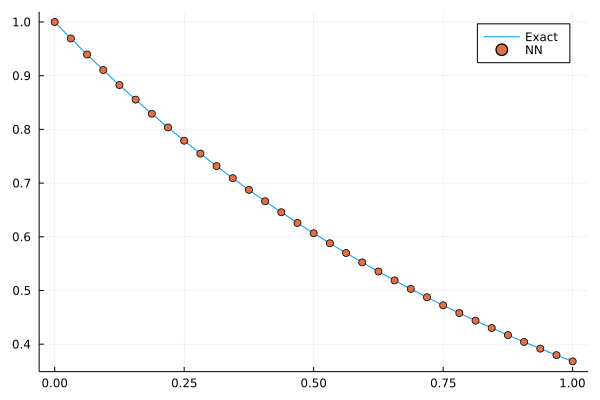

In [13]:
plot(xTest', yTest', label="Exact")
scatter!(xTest', yPred', label="NN")

## 2D Laplace solution

In [ ]:
xspan = 0.f0:0.1f0:2.f0
yspan = 0.f0:0.1f0:1.f0

x = collect(xspan)
y = collect(yspan)
nx = length(x)
ny = length(y)
xMesh, yMesh = meshgrid(x, y)
xMesh1D = reshape(xMesh, (1, :))
yMesh1D = reshape(yMesh, (1, :))
mesh = cat(xMesh1D, yMesh1D; dims=1)

X = deepcopy(mesh)
Y = zeros(Float32, 1, length(x)*length(y));

In [ ]:
m = FastChain(FastDense(2, 20, tanh), FastDense(20, 20, tanh), FastDense(20, 1))
p = initial_params(m);
θ = [vcat(X...); p];
#θ = p;
n = length(Y);

u(x) = sin.(π .* mat_split(x)[1] ./ 2.f0) .* mat_split(x)[2] .+ 
        mat_split(x)[1] .* (2.f0 .- mat_split(x)[1]) .* mat_split(x)[2] .* (1.f0 .- mat_split(x)[2]) .* m(x, p);

In [ ]:
function loss(θ)
    u0 =reshape(θ[1:n*2],2,n)
    p = θ[2n+1:end]
     
    u(x) = sin.(π .* mat_split(x)[1] ./ 2.f0) .* mat_split(x)[2] .+ 
        mat_split(x)[1] .* (2.f0 .- mat_split(x)[1]) .* mat_split(x)[2] .* (1.f0 .- mat_split(x)[2]) .* m(x, p)
    
    #ux(x) = pullback(u, x)[2](ones(size(x)))[1] |> mat_x
    #uy(x) = pullback(u, x)[2](ones(size(x)))[1] |> mat_y
    
    #uxx(x) = pullback(ux, x)[2](ones(size(x)))[1] |> mat_x
    #uyy(x) = pullback(uy, x)[2](ones(size(x)))[1] |> mat_y
    
    function ux(x)
        uu = reshape(u(x), (ny, :))
        xx = reshape(u0[1,:], (ny, :))
        dux = zeros(eltype(x), ny, nx)
        for i in 1:ny
            dux[i,:] .= central_diff(uu[i,:], xx[i,:])
        end
        
        return reshape(dux, (1, :))
    end
    function uy(x)
        uu = reshape(u(x), (ny, :))
        yy = reshape(u0[2,:], (ny, :))
        duy = zeros(eltype(x), ny, nx)
        for j in 1:nx
            duy[:,j] .= central_diff(uu[:,j], yy[:,j])
        end
        
        return reshape(duy, (1, :))
    end
    #=
    function uxx(x)
        uu = reshape(ux(x), (ny, :))
        xx = reshape(u0[1,:], (ny, :))
        d2ux = zeros(eltype(x), ny, nx)
        for i in 1:ny
            d2ux[i,:] .= central_diff(uu[i,:], xx[i,:])
        end
        
        return reshape(d2ux, (1, :))
    end
    function uyy(x)
        uu = reshape(uy(x), (ny, :))
        yy = reshape(u0[2,:], (ny, :))
        d2uy = zeros(eltype(x), ny, nx)
        for j in 1:nx
            d2uy[:,j] .= central_diff(uu[:,j], yy[:,j])
        end
        
        return reshape(d2uy, (1, :))
    end
    
    #pred = uxx(u0) .+ uyy(u0)
    =#
    
    #dx = unstruct_diff(u, u0, ny, 1)
    #dy = unstruct_diff(u, u0, ny, 2)
    d2x = unstruct_diff(ux, u0, ny, 1)
    d2y = unstruct_diff(uy, u0, ny, 2)
        
    pred = d2x .+ d2y
    loss = sum(abs2, pred)
    
    return loss, pred
end

In [ ]:
cb = function (θ, l, pred; isplot=false)
    display(l)
    return false
end

In [ ]:
res = DiffEqFlux.sciml_train(loss, θ, LBFGS(); cb=cb, maxiters=200, diffmode=DiffEqFlux.ReverseDiffMode())

In [ ]:
x0 = 0.; x1 = 2.
y0 = 0.; y1 = 1.
nxTest = 23; nyTest = 11

# meshgrid
xVecTest = Vector(range(x0, stop=x1, length=nxTest))
xMeshTest = repeat(reshape(xVecTest, 1, :), nyTest, 1)

yVecTest = Vector(range(y0, stop=y1, length=nyTest))
yMeshTest = repeat(yVecTest, 1, nxTest)

xMeshTest1D = reshape(xMeshTest, (1, :))
yMeshTest1D = reshape(yMeshTest, (1, :))
meshTest = cat(xMeshTest1D, yMeshTest1D; dims=1)

f_pred = u(meshTest)
f_pred = reshape(f_pred, (nyTest, nxTest));

In [ ]:
contourf(xVecTest, yVecTest, f_pred)

In [ ]:
ux(x) = mat_split(pullback(u, x)[2](ones(1, 231))[1])[1]
uxx(x) = mat_split(pullback(ux, x)[2](ones(1, 231))[1])[1]

In [ ]:
uxx(X)

In [ ]:
using Tracker

In [ ]:
ux(x) = mat_split(Tracker.forward(u, x)[2](1)[1])[1]
uxx(x) = mat_split(Tracker.forward(ux, x)[2](1)[1])[1]

In [ ]:
uxx(X)